In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.3/12.3 MB 19.1 MB/s eta 0:00:0000:0100:01
     ---------------------------------------- 18.2/18.2 MB 10.7 MB/s eta 0:00:0000:0100:01
     -------------------------------------- 341.8/341.8 KB 17.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 78.3/78.3 KB 1.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# 스타벅스

In [86]:
import requests

In [87]:
# 전국 스타벅스 매장리스트 가져올 url
url = "https://www.starbucks.co.kr/store/getSidoList.do"

In [88]:
payload= {
"in_biz_cds" : "0",
"in_scodes" : "0",
"ins_lat" : "37.56682",
"ins_lng" : "126.97865",
"search_text" : "",
"p_sido_cd" : "01",
"p_gugun_cd" : "",
"in_distance" : "0",
"in_biz_cd" : "",
"isError" : "true",
"searchType" : "C",
"set_date" : "",
"all_store" : "0",
"T03" : "0",
"T01" : "0",
"T27" : "0",
"T12" : "0",
"T09" : "0",
"T30" : "0",
"T05" : "0",
"T22" : "0",
"T21" : "0",
"T10" : "0",
"T36" : "0",
"T43" : "0",
"T48" : "0",
"Z9999" : "0",
"P10" : "0",
"P50" : "0",
"P20" : "0",
"P60" : "0",
"P30" : "0",
"P70" : "0",
"P40" : "0",
"P80" : "0",
"whcroad_yn" : "0",
"P90" : "0",
"P01" : "0",
"new_bool" : "0",
"iend" : "1000",
"rndCod" : "EMP6WZ23VQ",}


In [89]:
r = requests.post(url)
print(r.status_code)
print("------------")
for x in r.json()['list']:
    print(x['sido_nm'], x['sido_cd'])

200
------------
서울 01
경기 08
광주 02
대구 03
대전 04
부산 05
울산 06
인천 07
강원 09
경남 10
경북 11
전남 12
전북 13
충남 14
충북 15
제주 16
세종 17


In [94]:
import requests
import pandas as pd
from tqdm import tqdm

# 전국의 시도 url
url_cd = "https://www.starbucks.co.kr/store/getSidoList.do"
r = requests.post(url_cd)
# 스타벅스 지역의 정보 url
url_place = "https://www.starbucks.co.kr/store/getStore.do?r=6DKBI0DUO3"

total = []
for x in tqdm(r.json()['list']):
    #print(x['sido_nm'], x['sido_cd'])
    # 시도 코드를 payload를 지역정보의 값에 넣는다.
    payload['p_sido_cd'] = x['sido_cd']
    # 지역정보를 가지고 온다.
    r = requests.post(url_place, data=payload)
    # 요청의 결과를 r.json()['list']에서 받아와 데이터프레임 형태로 변환
    # 해당 정보를 json화 => 리스트를 가지고 온다. => total에 append 한다.
    total.append(pd.DataFrame(r.json()['list']))

# total을 다 합친다.
starbuck_df = pd.concat(total)


100%|██████████| 17/17 [00:06<00:00,  2.80it/s]


In [95]:
starbuck_df

,seq,sido_cd,sido_nm,gugun_cd,gugun_nm,code_order,view_yn,store_num,sido,gugun,...,p90,p01,t05,t30,t36,t27,t29,t43,t48,z9999
0,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
1,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
2,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
3,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
4,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
10,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
11,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0
12,0,None,None,None,None,None,None,None,None,None,...,0,0,0,0,0,0,0,0,0,0


In [96]:
starbuck_df['s_name'].unique().size

1887

In [116]:
starbuck_df.columns

Index(['seq', 'sido_cd', 'sido_nm', 'gugun_cd', 'gugun_nm', 'code_order',
       'view_yn', 'store_num', 'sido', 'gugun',
       ...
       'p90', 'p01', 't05', 't30', 't36', 't27', 't29', 't43', 't48', 'z9999'],
      dtype='object', length=133)

In [97]:
pd.set_option('display.max_columns', None)

In [98]:
# 데이터프레임에서 결측치가 일정 개수 이상인 열(column)들을 삭제하는 작업
star_df = starbuck_df.loc[:, ~(starbuck_df.isnull().sum() > 1800)].copy()

In [100]:
star_df['DT'] = star_df['s_name'].apply(lambda x : 'DT' in x)

In [101]:
star_df

,seq,p_pro_seq,p_sido_cd,p_gugun_cd,s_code,s_name,tel,fax,sido_code,sido_name,gugun_code,gugun_name,addr,new_state,theme_state,new_bool,search_text,ins_lat,ins_lng,in_distance,out_distance,all_search_cnt,addr_search_cnt,store_search_cnt,rowCount,store_nm,store_cd,s_biz_code,new_icon,set_user,favorites,defaultimage,in_biz_cds,in_scodes,vSal,istart,iend,open_dt,gold_card,ip_lat,ip_long,espresso,new_store,premiere_food,doro_address,cold_blew,my_siren_order_store_yn,whcroad_yn,skuNo,skuName,skuImgUrl,stock_count,store_area_code,lat,lot,t20,t04,t03,t01,t12,t09,t06,t10,p10,p50,p20,p60,p30,p70,p40,p80,t22,t21,p90,p01,t05,t30,t36,t27,t29,t43,t48,z9999,DT
0,0,0,,,1509,역삼아레나빌딩,1522-3232,02-568-3763,01,서울,0101,강남구,서울특별시 강남구 역삼동 721-13 아레나빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@@T52@T57@P80...,0,,,,0,9.26,-1,-1,-1,30,,0,3762,N,,0,/upload/store/2020/09/[3762]_20200917031519_6j...,0,0,,1,60,20190613,0,,,,,,서울특별시 강남구 언주로 425 (역삼동),,N,WHCROAD,,,,0,A01,37.501087,127.043069,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
1,0,0,,,1434,논현역사거리,1522-3232,02-3442-3673,01,서울,0101,강남구,서울특별시 강남구 논현동 142-2 정일빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T52@T57@P70@...,0,,,,0,7.38,-1,-1,-1,30,,0,3672,N,,0,/upload/store/2018/12/[3672]_20181211120009_t9...,0,0,,1,60,20181123,0,,,,,,서울특별시 강남구 강남대로 538 (논현동),,N,,,,,0,A01,37.510178,127.022223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,0,0,,,1595,신사역성일빌딩,1522-3232,02-547-3859,01,서울,0101,강남구,서울특별시 강남구 논현동 18-4 성일빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T34@T36@@T52...,0,,,,0,6.95,-1,-1,-1,30,,0,3858,N,,0,/upload/store/2022/01/[3858]_20220127064243_5k...,0,0,,1,60,20191219,0,,,,,,서울특별시 강남구 강남대로 584 (논현동),,N,,,,,0,A01,37.5139309,127.0206057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
3,0,0,,,1527,국기원사거리,1522-3232,02-568-3669,01,서울,0101,강남구,서울특별시 강남구 역삼동 648-22 동찬빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T30@T32@T34@@T52...,0,,,,0,8.82,-1,-1,-1,30,,0,3669,N,,0,/upload/store/2019/07/[3669]_20190730073527_5n...,0,0,,1,60,20190731,0,,,,,,서울특별시 강남구 테헤란로 125 (역삼동),,N,WHCROAD,,,,0,A01,37.499517,127.031495,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,0,0,,,1468,대치재경빌딩,1522-3232,02-568-3705,01,서울,0101,강남구,서울특별시 강남구 대치동 599 대원빌딩,None,Z9999@T05@T08@T16@T17@T20@T21@T22@T30@T32@T36@...,0,,,,0,10.92,-1,-1,-1,30,,0,3703,N,,0,/upload/store/2023/12/[3703]_20231217121347_eq...,0,0,,1,60,20190214,0,,,,,,서울특별시 강남구 남부순환로 2947 (대치동),,N,WHCROAD,,,,0,A01,37.494668,127.062583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0,0,,,2146,세종반곡,1522-3232,044-862-4430,17,세종,1701,None,"세종특별자치시 반곡동 41-17 105호,106호,107호,108호,204호,205...",None,T05@T08@T16@T17@T20@T21@T30@T32@T34@T48@T51@T5...,0,,,,0,122.45,-1,-1,-1,30,,0,4429,N,,0,/upload/store/2023/08/[4429]_20230816054209_d3...,0,0,,1,60,20230622,0,,,,,,세종특별자치시 한누리대로 1844 (반곡동),,N,,,,,0,A05,36.4978562567888,127.31004736092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
10,0,0,,,2041,세종한솔,1522-3232,044-866-4342,17,세종,1701,None,세종특별자치시 한솔동 968 공원빌딩,None,T20@T21@T30@T32@T34@T36@T43@T48@T52@T60@T09,0,,,,0,123.29,-1,-1,-1,30,,0,4343,N,,0,/upload/store/2022/09/[4343]_20220928094927_h7...,0,0,,1,60,20220929,0,,,,,,세종특별자치시 노을3로 101 (한솔동),,N,,,,,0,A05,36.479955,127.253348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
11,0,0,,,1750,세종소담,1522-3232,044-862-3977,17,세종,1701,None,"세종특별자치시 소담동 539 새샘마을7단지 근린생활시설 -1동 12호,13호,14호...",None,T05@T08@T16@T17@T20@T21@T30@T32@T34@@T48@T52@T...,0,,,,0,123.56,-1,-1,-1,30,,0,3976,N,,0,/upload/store/2021/01/[3976]_20210110113241_t1...,0,0,,1,60,20210115,0,,,,,,"세종특별자치시 소담3로 8 (소담동) 1동 12호,13호,14호,15호,15a호,16호",,N,,,,,0,A05,36.4

In [104]:
star_df.groupby('sido_name')['DT'].sum().sort_index()

sido_name
강원      11
강원도      5
경기     134
경남      28
경북      27
광주      27
대구      30
대전      17
부산      28
서울      23
세종       2
울산      14
인천      22
전남      14
전북      20
제주      16
충남      17
충북      12
Name: DT, dtype: int64

In [105]:
star_df.columns

Index(['seq', 'p_pro_seq', 'p_sido_cd', 'p_gugun_cd', 's_code', 's_name',
       'tel', 'fax', 'sido_code', 'sido_name', 'gugun_code', 'gugun_name',
       'addr', 'new_state', 'theme_state', 'new_bool', 'search_text',
       'ins_lat', 'ins_lng', 'in_distance', 'out_distance', 'all_search_cnt',
       'addr_search_cnt', 'store_search_cnt', 'rowCount', 'store_nm',
       'store_cd', 's_biz_code', 'new_icon', 'set_user', 'favorites',
       'defaultimage', 'in_biz_cds', 'in_scodes', 'vSal', 'istart', 'iend',
       'open_dt', 'gold_card', 'ip_lat', 'ip_long', 'espresso', 'new_store',
       'premiere_food', 'doro_address', 'cold_blew', 'my_siren_order_store_yn',
       'whcroad_yn', 'skuNo', 'skuName', 'skuImgUrl', 'stock_count',
       'store_area_code', 'lat', 'lot', 't20', 't04', 't03', 't01', 't12',
       't09', 't06', 't10', 'p10', 'p50', 'p20', 'p60', 'p30', 'p70', 'p40',
       'p80', 't22', 't21', 'p90', 'p01', 't05', 't30', 't36', 't27', 't29',
       't43', 't48', 'z9999', 'D

In [ ]:
# 스타벅스가 언제 오픈을 많이 했는지

In [110]:
from datetime import datetime

In [111]:
dict(zip(range(7), "월화수목금토일"))

{0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}

In [114]:
star_df["open_dt"] = pd.to_datetime(star_df["open_dt"])

In [115]:
star_df["open_dt"].apply(lambda x : dict(zip(range(7), "월화수목금토일"))[x.weekday()]).value_counts()

open_dt
목    622
금    505
수    316
화    312
월    111
토     19
일      2
Name: count, dtype: int64

In [117]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 11.6/11.6 MB 16.6 MB/s eta 0:00:0000:010:01
     ---------------------------------------- 1.6/1.6 MB 26.3 MB/s eta 0:00:00 0:00:01
     -------------------------------------- 310.7/310.7 KB 28.6 MB/s eta 0:00:00
     ---------------------------------------- 4.6/4.6 MB 21.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [118]:
star_df['open'] = star_df['open_dt'].apply(lambda x : f"{x.year}-{x.month}-01")

In [119]:
star_series = star_df.groupby('open', as_index=False)[['s_name']].count()

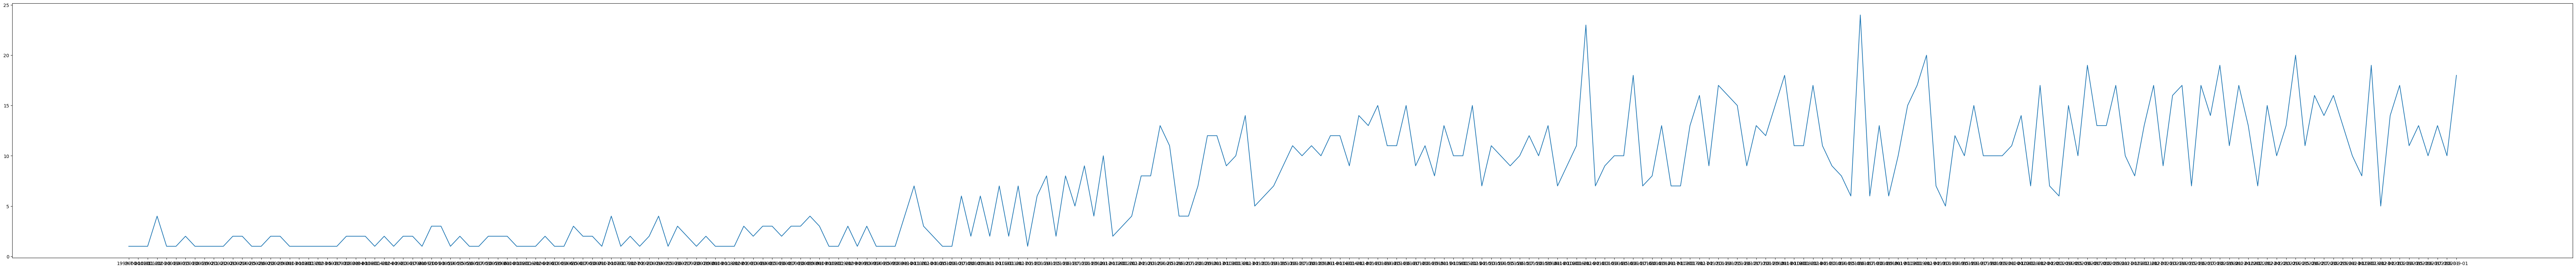

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 10))
plt.plot(star_series ['open'], star_series['s_name'])
plt.show()

In [125]:
pwd

'/home/root_user/workspace'

In [133]:
if ~os.path.isdir("./starbucks") == False:
    os.mkdir("./starbucks")

In [155]:
from urllib import request
import os 

# 폴더 확인 - 확인해서 없으면 만든다
if os.path.isdir("./starbucks") == False:
    os.mkdir("./starbucks")

image_url = "https://www.starbucks.co.kr"
for idx, row in tqdm(star_df.iterrows()):
    img = row['defaultimage']
    # print(image_url + img)
    # print(image_url)
    # print(img)
    request.urlretrieve(image_url + img, f"./starbucks/{row['defaultimage'].split('/')[-1]}")
    # while(True):
    #     try:
    #         request.urlretrieve(image_url + img, f"./starbucks/{row['defaultimage'].split('/')[-1]}")
    #         break
    #     except:
    #         time.sleep(5)

1887it [16:55,  1.86it/s]


In [149]:
for idx, row in star_df.iterrows():
    print(row['s_name'])
    print(row['defaultimage'].split('/')[-1])
    

역삼아레나빌딩
[3762]_20200917031519_6juwr.JPG
논현역사거리
[3672]_20181211120009_t9i9n.jpg
신사역성일빌딩
[3858]_20220127064243_5khni.jpg
국기원사거리
[3669]_20190730073527_5nk40.jpg
대치재경빌딩
[3703]_20231217121347_eqnky.jpg
봉은사역
[3912]_20200527074116_twz04.jpg
압구정윤성빌딩
[3893]_20210828042809_9v371.jpg
코엑스별마당
[3897]_20200416024102_gur3n.jpg
삼성역섬유센터R
[3648]_20190416114636_1vz1i.jpg
압구정R
[3623]_20191125073032_uaqua.jpg
수서역R
[3588]_20180625121751_b9cya.JPG
양재강남빌딩R
[3604]_20200703010217_yqu8z.jpg
선릉동신빌딩R
[3562]_20180326063222_r20gs.jpg
봉은사로선정릉
[3564]_20180417045105_xv16y.jpg
강남오거리
[3483]_20170818074753_u95cx.jpg
스타필드코엑스몰R
[3467]_20180226085535_lizi2.jpg
강남구청정문
[3397]_20170328092242_kyldo.jpg
도곡공원
[3496]_20170824060802_bp0s9.jpg
강남R
[3478]_20170822020135_a2lao.png
대치은마사거리
[3315]_20160812065240_v3o5e.jpg
청담영동대로
[3370]_20170715044954_rfniu.jpg
압구정
[3303]_20211020080232_ccnsn.jpg
신사가로수
[3355]_20230730024721_ry7az.jpg
청담스타R
[3366]_20200919014258_y0mzi.jpg
강남우성
[3346]_20210902031512_flvb3.jpg
학동사거리
[3171]_20211012080419_8vzj

# 지하철 파일 형식 통일 정리

In [25]:
import os
import pickle
import pandas as pd

In [26]:
# root 폴더 경로
dir_path = "/home/root_user/workspace/subway"

In [ ]:
# ME

In [27]:
import os

# root 폴더 경로
dir_path = "/home/root_user/workspace/subway"

for file in os.listdir(dir_path):
    filePath = os.path.join(dir_path, file)
    fileName, fileExtension = os.path.splitext(file)
    fileName = fileName.split("_")[-1]
    print(fileName)

/home/root_user/workspace/subway/Subway_201609.csv
/home/root_user/workspace/subway/Subway_201610.csv
/home/root_user/workspace/subway/Subway_201611.csv
/home/root_user/workspace/subway/Subway_201605.csv
/home/root_user/workspace/subway/Subway_201608.csv
/home/root_user/workspace/subway/Subway_201606.csv
/home/root_user/workspace/subway/Subway_201601.csv
/home/root_user/workspace/subway/Subway_201603.csv
/home/root_user/workspace/subway/Subway_201607.csv
/home/root_user/workspace/subway/Subway_201612.csv
/home/root_user/workspace/subway/Subway_201604.csv
/home/root_user/workspace/subway/Subway_201602.csv


In [32]:
# 모든 CSV 파일을 담을 빈 리스트 생성
all_data = []

for file in os.listdir(dir_path):
    filePath = os.path.join(dir_path, file)
    # fileName, fileExtension = os.path.splitext(file)
    # fileName = fileName.split("_")[-1]
    # csv 파일 읽기
    data = pd.read_csv(filePath, encoding="euc-kr")
    all_data.append(data)

# 모든 데이터프레임을 합쳐서 하나의 데이터프레임으로 만듦
# combined_data = pd.concat(all_data, ignore_index=True)

In [33]:
all_data[0].shape

(7140, 24)

In [ ]:
# Lec

In [ ]:
import os
import pandas as pd

In [57]:
for roots, dirs, files in os.walk(dir_path):
    for file in files:
        # print(roots)
        # print(f"{roots}{file}")
        locals()[file.split(".")[0]] = pd.read_csv(f"{roots}/{file}", encoding='cp949')

In [65]:
total = []

for file in sorted(os.listdir(dir_path)):
    pd.read_csv(f"./subway/{file}", encoding='euc-kr')
    total.append(pd.read_csv(f"./subway/{file}", encoding='euc-kr'))

In [61]:
# 같은 코드
total = [pd.read_csv(f"./subway/{file}", encoding='euc-kr') for file in sorted(os.listdir("./subway"))]

In [66]:
total

[               날짜   호선        역명 구 분   할인  04 ~ 05  05 ~ 06  06 ~ 07  07 ~ 08  \
 0      2016-01-01  1호선  서울역(150)  승차   일반       44      298      243      490   
 1      2016-01-01  1호선  서울역(150)  승차  초등생        1        4        0        4   
 2      2016-01-01  1호선  서울역(150)  승차  청소년        8       33       15       16   
 3      2016-01-01  1호선  서울역(150)  승차  대학생        0        0        0        0   
 4      2016-01-01  1호선  서울역(150)  승차   우대       11       70       78       65   
 ...           ...  ...       ...  ..  ...      ...      ...      ...      ...   
 52665  2016-01-31  4호선  남태령(434)  승차   우대        0        5        7        4   
 52666  2016-01-31  4호선  남태령(434)  하차   일반        0        0        4        9   
 52667  2016-01-31  4호선  남태령(434)  하차  초등생        0        0        0        0   
 52668  2016-01-31  4호선  남태령(434)  하차  청소년        0        0        0        0   
 52669  2016-01-31  4호선  남태령(434)  하차   우대        0        0        7        7   
 
        08 ~ 0

In [67]:
total.__len__()

12

In [70]:
for x in total:
    print(x.columns)
    print("------------")
    print(x.shape)
    print("------------")

Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
------------
(52670, 29)
------------
Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02', '02 ~ 03', '03 ~ 04'],
      dtype='object')
------------
(50050, 29)
------------
Index(['날짜', '호선', '역명', '구 분', '할인', '04 ~ 05', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
 

In [71]:
import pandas as pd

# 두 개의 DataFrame을 생성
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Value1': [10, 20, 30]})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Value2': [25, 35, 45]})

# 'ID' 컬럼을 기준으로 두 DataFrame을 결합
merged_df = pd.merge(df1, df2, on='ID', how='outer')  # 'outer'는 외부 조인으로 모든 행을 포함합니다.

print(merged_df)


   ID  Value1  Value2
0   1    10.0     NaN
1   2    20.0    25.0
2   3    30.0    35.0
3   4     NaN    45.0
